In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import catboost as cb

### Data

In [19]:
file_path = 'merged_2.csv'

df = pd.read_csv(file_path, encoding='euc-kr')
# df = df.drop('spo2',axis=1)
df = df.dropna()
# df['bmi'] = df['weight']/((df['height']/100)**2)
df.head()
print(len(df))

,id,antihypertensives,dbp,fasting,glucose,height,pulse,sbp,temp,weight,pat_sex,pat_birth
0,0,0.0,79.0,1.0,100.0,169.8,75.0,123.0,37.1,65.7,F,1971
1,0,0.0,70.0,1.0,106.0,171.1,69.0,109.0,36.4,65.0,F,1971
2,0,0.0,70.0,1.0,106.0,169.6,79.0,109.0,37.1,64.1,F,1971
3,1,0.0,82.0,1.0,100.0,148.7,58.0,140.0,35.9,49.4,F,1959
4,1,1.0,73.0,1.0,100.0,151.3,59.0,108.0,36.2,48.9,F,1959


In [20]:
# df = df[df['glucose'] <= 140]

features = df.drop(['glucose'],axis=1)
targets = df['glucose']

label_encoder = LabelEncoder()
features['pat_sex'] = label_encoder.fit_transform(features['pat_sex'])

# X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

X_train = features[features['id'] < 281]
y_train = targets[features['id'] < 281]
X_test = features[features['id'] >= 281]
y_test = targets[features['id'] >= 281]

# ID 열을 삭제 (훈련 및 테스트 데이터의 입력(features)에서만)
X_train = X_train.drop(['id'], axis=1)
X_test = X_test.drop(['id'], axis=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 학습 세트에서 glucose가 180 이상인 데이터 제거
# train_mask = y_train < 140
# X_train = X_train[train_mask]
# y_train = y_train[train_mask]

# 테스트 세트에서 glucose 값이 180 이상인 데이터 제거
# test_mask = y_test < 180
# X_test = X_test[test_mask]
# y_test = y_test[test_mask]

print(len(df))
print(len(X_train))
print(len(X_test))

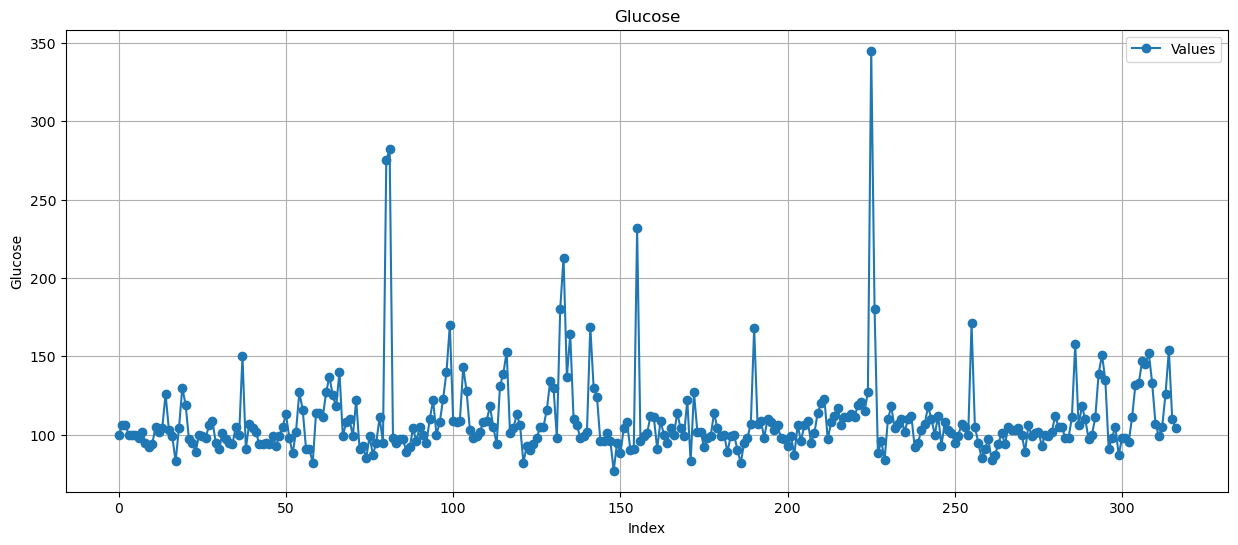

In [17]:
# 실제 값 (glucose 열)
df_1 = df['glucose']

# 그래프 그리기
plt.figure(figsize=(15, 6))
plt.plot(df_1.values, label='Values', marker='o')
plt.title('Glucose')
plt.xlabel('Index')
plt.ylabel('Glucose')
plt.legend()
plt.grid(True)
plt.show()

## Catboosting Regressor

DBP Mean Squared Error (MSE): 318.24243835376313


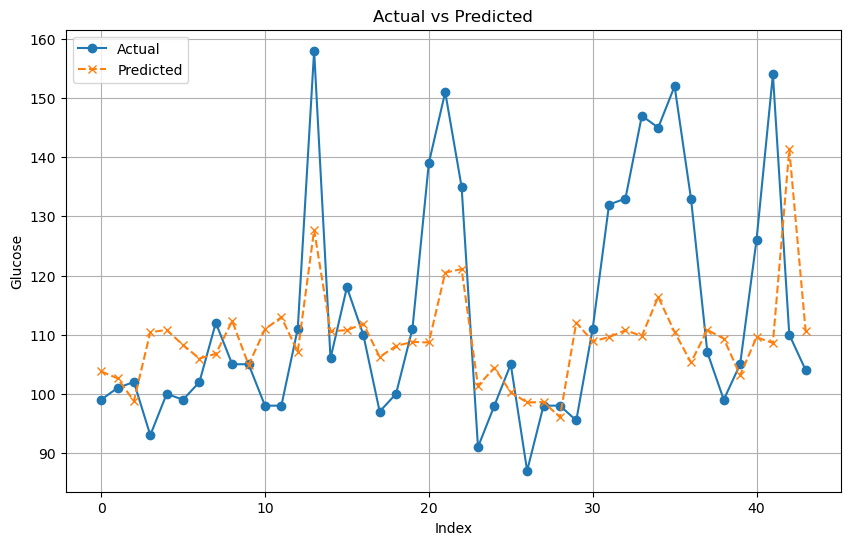

In [22]:
import catboost as cb

model = cb.CatBoostRegressor(n_estimators=10000, learning_rate=0.005, max_depth=10, random_state=42, verbose=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("DBP Mean Squared Error (MSE):", mse)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', linestyle='--', marker='x')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Glucose')
plt.legend()
plt.grid(True)
plt.show()

## GradientBoostingRegressor

In [7]:
model = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.005, max_depth=10, random_state=42, loss='absolute_error')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("DBP Mean Squared Error (MSE):", mse)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x')
plt.title('Actual vs Predicted Glucose Values')
plt.xlabel('Sample Index')
plt.ylabel('Glucose')
plt.legend()
plt.grid(True)
plt.show()

DBP Mean Squared Error (MSE): 346.0299882737949


## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

# Linear Regression model
linear = LinearRegression()

# Train
linear.fit(X_train, y_train)

# Predictions
y_pred = linear.predict(X_test)

# Coefficients & Intercepts
coefficients = linear.coef_
intercept = linear.intercept_

# MSE and RMSE
mse = mean_squared_error(y_test, y_pred)

result = (coefficients, intercept, mse) 

print("DBP MSE: {:.2f}".format(mse))

# Plotting actual vs predicted values for DBP
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x')
plt.title('Actual vs Predicted Glucose Values')
plt.xlabel('Sample Index')
plt.ylabel('Glucose')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest (One-hot-encoding)

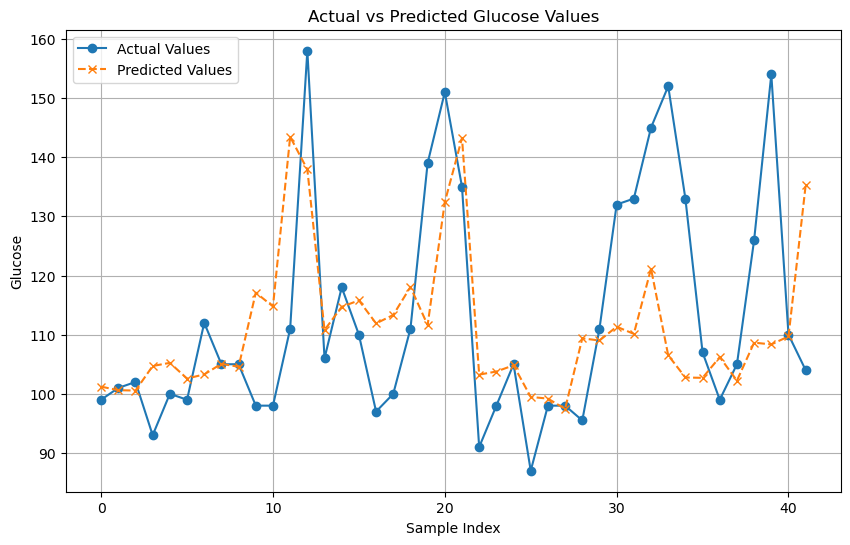

Mean Squared Error (MSE): 298.1696363042329


In [14]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x')
plt.title('Actual vs Predicted Glucose Values')
plt.xlabel('Sample Index')
plt.ylabel('Glucose')
plt.legend()
plt.grid(True)
plt.show()

## SVM

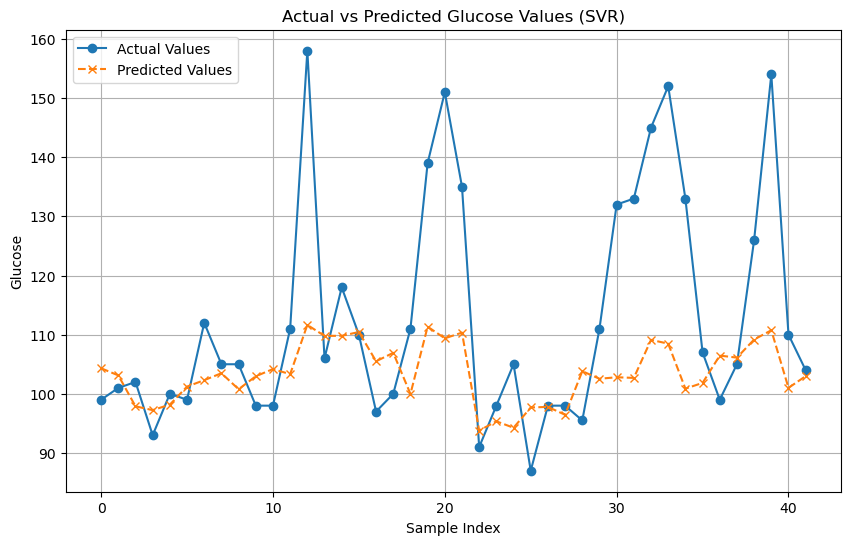

Mean Squared Error (MSE): 347.15030491613174


In [16]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x')
plt.title('Actual vs Predicted Glucose Values (SVR)')
plt.xlabel('Sample Index')
plt.ylabel('Glucose')
plt.legend()
plt.grid(True)
plt.show()